## Clasificación de conjuntos de imágenes

### Librerias a utilizar

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image


### Paso 1a. Lectura del conjunto de datos

#### Leyendo el conjunto Train. Primera Forma de transformar las imagenes en tensores

In [3]:
# Set the directory path where your images are located
image_dir = 'C:/Users/gfern/Downloads/dogs_cats_mod1/train/'

# Create a list to store the image vectors. Conjunto X_train
X_train = []
im=0
# Loop through all the images in the directory
for filename in os.listdir(image_dir):
    im+=1
    print(f'imagen: {im}', end='\r')
    
    if filename.endswith(".jpg"):
        
        # Open the image using PIL
        img = Image.open(os.path.join(image_dir, filename))
        
        # Resize the image to 200x200 pixels (segun exigencia del proyecto)
        img = img.resize((200, 200))
        
        # Convirtiendo la imagen to a numpy array
        img_array = np.array(img)

        # Reshape la imagen en la forma adecuada para el modelo
        img_tensor = img_array.reshape((200, 200, 3))
        
        # Append the vector to the list
        X_train.append(img_tensor)

# Convert the list to a numpy array
X_train = np.array(X_train)

print(X_train.shape)  # (25000, 200, 200, 3)


(25000, 200, 200, 3)


- Normalizando X_train

In [4]:
X_train = np.divide(X_train, 255.0)

In [9]:
# Initialize lists to store labels. Si imagen Cat entonces y=1 si no 0 / Si imagen Dog entonces y=1 si no 0
y_train = []

for file in os.listdir(image_dir):
    # Check if the file is an image
    if file.endswith('.jpg'):
        # Create the label
        if file.startswith('cat'):
            y_train.append([1, 0]) 
        elif file.startswith('dog'):
            y_train.append([0, 1]) 
    
      
# Convert lists to numpy arrays
y_train = np.array(y_train)

print(y_train.shape)


(25000, 2)


In [10]:
y_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

#### Leyendo el conjunto Test

In [11]:
# Set the directory path where your images are located
image_dir_test = 'C:/Users/gfern/Downloads/dogs-vs-cats/test'

# Create a list to store the image vectors. Conjunto X_train
X_test = []
im1=0
# Loop through all the images in the directory
for filename_ts in os.listdir(image_dir_test):
    im1+=1
    print(f'imagen: {im1}', end='\r')
    if filename_ts.endswith(".jpg"):
        # Open the image using PIL
        imgts = Image.open(os.path.join(image_dir_test, filename_ts))
        
        # Resize the image to 200x200 pixels (just in case)
        imgts = imgts.resize((200, 200))
        
        # Convert the image to a numpy array
        img_arrayts = np.array(imgts)
        
        # Reshape la imagen en la forma adecuada para el modelo
        img_tensorts = img_arrayts.reshape((200, 200, 3))
        
        # Append the vector to the list
        X_test.append(img_tensorts)

# Convert the list to a numpy array
X_test = np.array(X_test)

print(X_test.shape)  # (12500, 200, 200, 3)

(12500, 200, 200, 3)


- Normalizando X_test

In [12]:
X_test = np.divide(X_test, 255.0)

In [13]:
X_test

array([[[[0.15686275, 0.2627451 , 0.38039216],
         [0.14901961, 0.25098039, 0.38431373],
         [0.15686275, 0.25882353, 0.40392157],
         ...,
         [0.3254902 , 0.45490196, 0.83921569],
         [0.29803922, 0.43921569, 0.80392157],
         [0.18823529, 0.33333333, 0.67843137]],

        [[0.16078431, 0.26666667, 0.38823529],
         [0.14117647, 0.24313725, 0.38039216],
         [0.12941176, 0.23137255, 0.37647059],
         ...,
         [0.33333333, 0.44705882, 0.83529412],
         [0.29803922, 0.42352941, 0.79607843],
         [0.18823529, 0.32156863, 0.6745098 ]],

        [[0.15294118, 0.25882353, 0.38039216],
         [0.12156863, 0.22352941, 0.36078431],
         [0.15686275, 0.25882353, 0.40392157],
         ...,
         [0.34901961, 0.44313725, 0.83921569],
         [0.31764706, 0.42352941, 0.80784314],
         [0.20392157, 0.32156863, 0.68627451]],

        ...,

        [[0.69411765, 0.71372549, 0.75686275],
         [0.71764706, 0.73333333, 0.78039216]

In [17]:
print('X_train:', X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)

X_train: (25000, 200, 200, 3)
y_train: (25000, 2)
X_test: (12500, 200, 200, 3)


#### Guardando los datos train y test en archivos binarios

In [18]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)

### Paso 1b. Lectura del conjunto de datos. 

- Leyendo el conjunto Train. Segunda Forma de transformar las imagenes en tensores. Usando la biblioteca Keras (ImageDataGenerator), se uso un espacio de trabajo en Kaggle, además del uso de un acelarador grafico para poder ejecutar el modelo en 20 epochs. Ver archivo explore_alt.ipynb. De igual manera, se muestra la obtención de los tensores de las imágens con ImageDataGenerator.

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import time

start_time = time.time()

# Directorio donde tienes la data train, una carpeta por clase
image_dir = "C:/Users/gfern/Downloads/dogs-vs-cats/train/"

# Creando el objeto ImageDataGenerator con normalización
datagen = ImageDataGenerator(rescale=1./255)

# Crear un generador para las imágenes
batch_size = 32
cant_imag = 25000
pix1 = 200
pix2 = 200
rgb = 3
num_samples = round((25000 / batch_size) + 1)  # número total de muestras

generator = datagen.flow_from_directory(
    directory=image_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['cat', 'dog']
)

# Inicialización de los tensores
X_train2 = np.zeros((cant_imag, pix1, pix2, rgb))
y_train2 = np.zeros((cant_imag, 2))

cont = 0

for x_batch, y_batch in generator:
    start_idx = cont * batch_size
    end_idx = start_idx + x_batch.shape[0]
    
    X_train2[start_idx:end_idx] = x_batch
    y_train2[start_idx:end_idx] = y_batch
    
    cont += 1
    elapsed_time = time.time() - start_time
    minutes, seconds = divmod(elapsed_time, 60)
    print(f'imagen: {cont * batch_size}, tiempo transcurrido: {minutes:.0f} minutos y {seconds:.2f} segundos', end='\r')
    
    if cont * batch_size >= cant_imag: # para poder salir del bucle infinito
        break
print(' ')
print('X_train:',X_train2.shape)  # Debería imprimir (25000, 200, 200, 3)
print('y_train:',y_train2.shape)  # Debería imprimir (25000, 2)


Found 25000 images belonging to 2 classes.
 magen: 25024, tiempo transcurrido: 0 minutos y 48.93 segundos
X_train: (25000, 200, 200, 3)
y_train: (25000, 2)


### Paso 2: Visualizacion Información de Entrada Corregida a 200x200 Pixeles

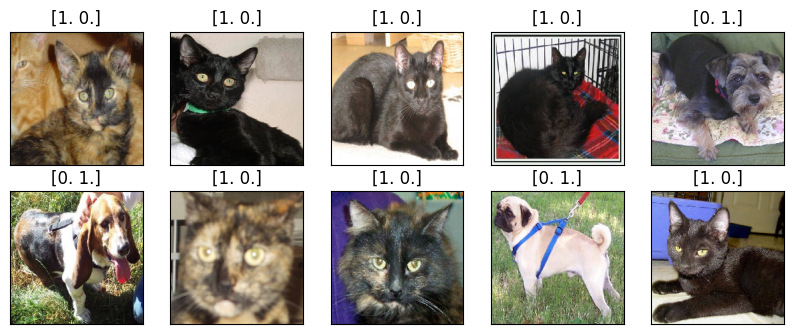

In [26]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train2[i])
    plt.title(y_train2[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

### Paso 3: Construccion Modelo RNA

In [34]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))


#### Compilando el modelo

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)


(25000, 200, 200, 3)
(25000, 2)
(12500, 200, 200, 3)


#### Entrenando el modelo

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5952s 38s/step - accuracy: 0.6200 - loss: 0.8585 - val_accuracy: 0.0000e+00 - val_loss: 1.0158
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 37333s 239s/step - accuracy: 0.6269 - loss: 0.6613 - val_accuracy: 0.0000e+00 - val_loss: 0.9344
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5899s 38s/step - accuracy: 0.6221 - loss: 0.6635 - val_accuracy: 0.0000e+00 - val_loss: 0.9579
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5817s 37s/step - accuracy: 0.6292 - loss: 0.6599 - val_accuracy: 0.0000e+00 - val_loss: 0.9541
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5780s 37s/step - accuracy: 0.6237 - loss: 0.6631 - val_accuracy: 0.0000e+00 - val_loss: 0.9977


In [ ]:
_, accuracy1 = model.evaluate(X_train, y_train)

print(f"Accuracy: {accuracy1}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1358s 2s/step - accuracy: 0.8455 - loss: 0.5431
Accuracy: 0.5


### Paso 4: Predicción del modelo

In [ ]:
y_test=model.predict(X_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 714s 2s/step


### Conclusiones

- El accuracy (0,5) del modelo no es muy bueno, pudiendose mejorar quizas aumentando las epochs, pero con los recursos locales que tengo, eso representaria mucho tiempo de computo.

- Usando Kaggle, voy a tratar de llevar las epochs a 20 para observar que pasa y avaluar algunas predicciones con el conjunto X_test.